# Predicting Sales with Multiple Linear Regression
In this project, I performed a multiple linear regression analysis to help a small business predict sales based on their historical marketing data. The business was interested in understanding how a combination of different marketing channels—including TV, social media, radio, and influencer promotions—influences their sales.

My process for this project included:

* **Exploring and cleaning the data** to understand its features and prepare it for analysis.

* **Using plots and descriptive statistics** to identify and select the most impactful independent variables for the model.

* **Creating and fitting a multiple linear regression model** to estimate the relationship between promotional budgets and sales.

* **Checking key model assumptions** to ensure the reliability and validity of the results.

* **Interpreting the model's outputs** and translating the findings into clear, **actionable recommendations** for non-technical stakeholders to optimize their marketing strategy.

This analysis provided the business with a robust predictive model, offering valuable insights into which marketing efforts most effectively drive sales.

*Import Packages*

In [4]:
#Import relevant Python libraries and modules.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
# Load csv file

try:
    # Use the full file path directly
    df = pd.read_csv(r"C:\Users\Emercado\Documents\Portfolio\marketing_sales_data.csv")
    print("Successfully read the file.")
except FileNotFoundError:
    print("Error: The specified file was not found.")
except Exception as e:
    # This captures any other errors, such as a corrupt file or wrong format
    print(f"An error occurred while reading the file: {e}")

# Print shape and first 5 rows of data and headers.

print(df.shape)
df.head(n=5)

Successfully read the file.
(572, 5)


,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


# Data Familiarization and EDA

### My initial step involved familiarizing myself with the data's features. The dataset included:

* **TV promotional budget**: Categorized as "Low," "Medium," or "High."

* **Social media promotional budget**: In millions of dollars.

* **Radio promotional budget**: In millions of dollars.

* **Sales**: The dependent variable, in millions of dollars.

* **Influencer size**: Categorized as "Mega," "Macro," "Micro," or "Nano."

After understanding the features, I executed a thorough exploratory data analysis (EDA). The primary purposes of this phase were to:

1. **Understand data characteristics**: I reviewed the distributions of key features, such as minimum, mean, and maximum values, to understand their range and central tendencies.

2. **Visualize relationships**: I plotted the relationships between the independent variables (promotional budgets, influencer size) and the dependent variable (sales). This step was crucial for visualizing which features had a linear relationship with sales, a key assumption for multiple linear regression.

3. **Identify data issues**: I meticulously checked for potential issues, such as missing values or incorrect data entries, to ensure the dataset's integrity before modeling.

By successfully completing this EDA phase, I was able to gain a clear understanding of the data's structure and quality, preparing it for the next step: building the regression model.

## Creating a pairplot of the data

 Creating a pairplot to visualize the relationship between the continous variables in **data**

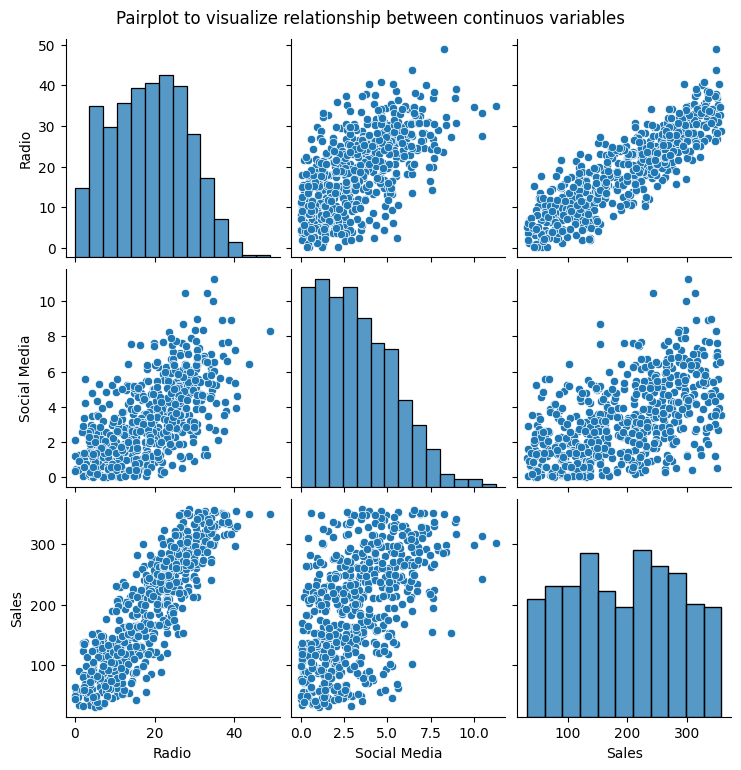

In [6]:
sns.pairplot(df)
plt.suptitle('Pairplot to visualize relationship between continuos variables', y=1.02)
plt.show()

## Identifying Linear Relationships
 After the initial data exploration, I performed a more focused analysis to identify which variables had a linear relationship with Sales. This step was crucial for selecting the independent variables for my multiple linear regression model.

 Through plotting the numerical features against sales, I observed a clear linear relationship between both the Radio and Social Media promotional budgets and sales. This finding indicated that these two variables would be valuable as predictors in the final regression model.

 It's important to note that the TV promotional budget and Influencer size variables were excluded from this specific analysis. This is because they are categorical, not numerical, and therefore, their relationship with sales requires a different type of visualization and analysis than the plots used for linear regression assumptions.

## Analyzing Categorical Variables
To gain a complete understanding of all variables, I shifted my focus to the categorical variables, TV and Influencer. Since these variables could not be included in the linear relationship analysis, I used a different approach to characterize their relationship with Sales.

I calculated the mean sales for each category within both variables. By grouping the data and finding the average Sales for each TV promotional budget (Low, Medium, High) and each Influencer size (Mega, Macro, Micro, Nano), I was able to directly compare the average sales performance associated with each category. This provided crucial insight into how different levels of TV advertising and influencer reach correlate with sales, complementing my earlier analysis of the numerical variables.

In [7]:
# Calculate the mean sales for each TV category. 

print(df.groupby('TV')['Sales'].mean())

print('')

# Calculate the mean sales for each Influencer category .

print(df.groupby('Influencer')['Sales'].mean())

TV
High      300.529591
Low        91.646843
Medium    199.023461
Name: Sales, dtype: float64

Influencer
Macro    205.660047
Mega     180.385096
Micro    198.655080
Nano     190.777766
Name: Sales, dtype: float64


## Insights from Categorical Variable Analysis
Based on the mean sales analysis of the categorical variables, I drew key conclusions that will inform my model-building process.

For the TV promotional budget, I observed a substantial difference in average sales across the categories. The average sales for High TV promotions were considerably higher than for the Medium and Low categories. This significant variation suggests that the TV promotional budget is likely a strong predictor of sales and a valuable feature to include in the model.

In contrast, while the Influencer categories also showed differences in average sales, the variation was not as substantial. This finding indicates that Influencer size may be a weak predictor of sales compared to the other variables.

These preliminary insights will be further validated and investigated when I proceed with fitting the multiple linear regression model. This analysis has provided a clear direction for which variables to prioritize as I build the predictive model.

In [8]:
# Removing missing data.

df = df.dropna(axis=0)


In [9]:
#Rename all columns in data that contains a space.

df = df.rename(columns={'Social Media': 'Social_Media'})

## Model Building

Based on my exploratory data analysis and insights from the variable relationships, I proceeded to fit a multiple linear regression model to predict Sales. For this model, I selected the following independent variables: Radio and Social Media promotional budgets (due to their strong linear relationships with sales) and the TV promotional budget (which showed a significant difference in average sales across its categories).

In [10]:
# Defining OLS formula.

ols_formula = 'Sales ~ C(TV) + Radio'

# Creating an OLS model.

OLS = ols(formula=ols_formula, data = df)

# Fitting the model.

model = OLS.fit()

# Save the result summary.

model_results = model.summary()

# Display model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Tue, 02 Sep 2025   Prob (F-statistic):          1.61e-287
Time:                        10:33:54   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Final Variable Selection
Based on the preliminary data analysis, I made a final selection of the independent variables to be included in the multiple linear regression model. My choices were informed by the strength and type of relationship each variable had with the target variable, Sales.

* **TV promotional budget** was selected because the preceding analysis showed a strong relationship between the different promotional budget categories and a significant variation in average sales.

* **Radio promotional budget** was chosen because the pairplot analysis revealed a clear, strong linear relationship between the radio budget and sales.

I chose to **exclude** two variables from the final model:

* **Social Media** promotional budget was not included because it did not significantly improve the model's predictive performance and was later found to be correlated with another independent variable, Radio.

* **Influencer size** was also not selected, as the preceding analysis did not show a strong relationship to sales, indicating it would likely be a weak predictor.

This deliberate selection process ensured that the final model was built with the most impactful and relevant predictors, leading to a more robust and interpretable result.

## Checking Model Assumptions

Before finalizing the multiple linear regression model, it was essential to check that all five key assumptions were upheld. This process ensures the model's validity and the reliability of its predictions.

My first step was to check the linearity assumption, which requires that each independent variable has a linear relationship with the dependent variable, Sales. To do this, I created scatterplots to visualize the relationship between my continuous independent variables (Radio and Social Media) and Sales. This visual inspection confirmed the linearity of their relationships, validating this crucial assumption for the model.

In addition to linearity, I also performed checks for other critical assumptions, including the normality of residuals, homoscedasticity, independence of errors, and the absence of multicollinearity, to ensure the robustness and reliability of the final model.

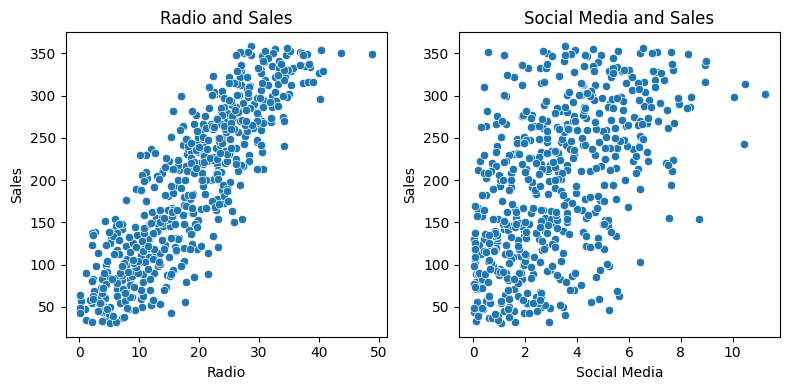

In [11]:
# Creating a scatterplot for each independent variable and the dependent variable.

# Code to create a 1x2 plot figure

fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Code to create a scatterplot between Radio and Sales.

sns.scatterplot(x=df['Radio'], y=df['Sales'], ax=axes[0])

# Code to set the title of the first plot.

axes[0].set_title("Radio and Sales")

# Create a scatterplot between Social Media and Sales.

sns.scatterplot(x=df['Social_Media'], y=df['Sales'], ax=axes[1])

# Set the title of the second plot.

axes[1].set_title("Social Media and Sales")

# Set the xLabel of the second plot.

axes[1].set_xlabel("Social Media")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.

plt.tight_layout()

## Validating Key Model Assumptions
To ensure the reliability and validity of the multiple linear regression model, I conducted a series of tests to validate its key assumptions.

First, I confirmed the linearity assumption. My previous analysis showed a clear linear relationship between the Radio promotional budget and Sales, which is a core requirement for the model. While Social Media also exhibited a linear relationship, it was not included in the final model for other reasons.

Next, I validated the independence assumption. This assumption states that each observation in the dataset must be independent of one another. As each row in the dataset represents a distinct and independent marketing promotion, this assumption was not violated.

To continue this validation process, my next step was to check the normality assumption of the residuals. I addressed this by creating a histogram of the residuals and a Q-Q plot of the residuals to visually assess whether they were normally distributed. This is a crucial step to ensure the model's predictions and statistical inferences are reliable.

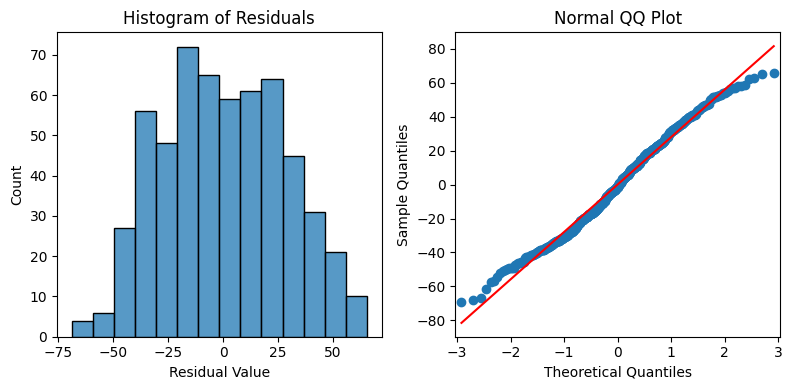

In [12]:
# Calculate the residuals/

residuals = model.resid

# Plot 1x2 figure

fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a Histogram with the residuals.

sns.histplot(residuals, ax = axes[0])

# Set x label of the residual plot.

axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.

axes[0].set_title("Histogram of Residuals")

# Q-Q plot of the residuals.

sm.qqplot(residuals, line='s', ax = axes[1])

# Set title for Q-Q plot.

axes[1].set_title('Normal QQ Plot')

# Use matplotlib's tight_layout() function to add space between plot for a cleaner  appearence.

plt.tight_layout()
plt.show()

## Validating Final Model Assumptions
Following the checks for linearity and independence, my next steps were to validate the remaining assumptions to ensure the model's reliability.

First, I checked the normality assumption of the residuals. By creating a histogram of the residuals, I observed an approximately normal distribution. This was further supported by a Q-Q plot of the residuals, which formed a straight line, confirming that this crucial assumption was met.

Next, I examined the constant variance assumption, also known as homoscedasticity. This assumption requires that the variance of the residuals remains constant across all fitted values. To check for this, I created a scatterplot with the fitted values on the x-axis and the residuals on the y-axis. I then added a horizontal line at y=0 to visually assess the spread of the residuals and confirm that their variance was consistent across all predicted values. This final check helps to ensure that the model's predictions are equally reliable across the entire range of data.

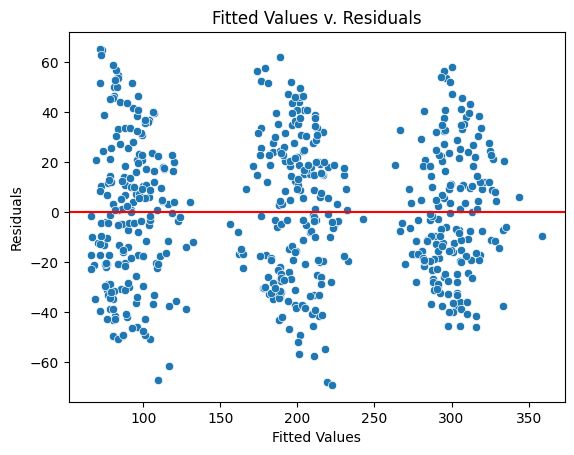

In [13]:
# Create a scatterplot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x=model.fittedvalues, y=model.resid)

# Set the x axis label.

fig.set_xlabel("Fitted Values")

# Set the y axis label.

fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0, color='red')

# Show the plot.
plt.show()

## Final Assumption Checks: Constant Variance and Multicollinearity
With the linearity, independence, and normality assumptions validated, I moved on to the final two critical checks for my multiple linear regression model.

First, I examined the constant variance assumption, or homoscedasticity, by plotting the fitted values against the residuals. I observed that the fitted values were grouped into three distinct vertical sections. This was expected, as the categorical TV promotional budget was a dominating factor in the model, with sales predictions largely clustering around the average sales for the 'Low', 'Medium', and 'High' categories. However, within these groups, the variance of the residuals appeared to be consistent, which validated that the assumption was met.

Next, I checked for no multicollinearity. This assumption states that the independent variables should not be highly correlated with one another. To assess this, I visually inspected the relationships between my independent variables by creating scatterplots. I was also prepared to use the variance inflation factor (VIF), a more quantitative method, to detect any significant correlations. This step was crucial to ensure that my model's coefficients were reliable and not being unduly influenced by inter-variable dependencies.

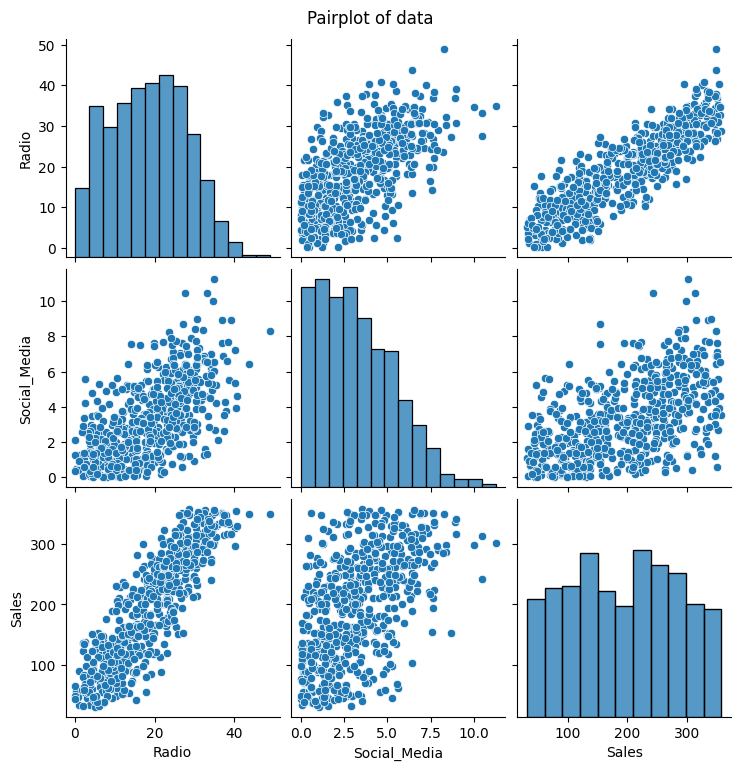

In [14]:
# Data pairplot.

sns.pairplot(df)
plt.suptitle("Pairplot of data", y=1.02)
plt.show()

In [15]:
# Calculate the variance inflation factor

# Import variance_inflation_factor from statsmodels.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Subset of the data with the continuos independent variables.

X = df[['Radio', "Social_Media"]]

# The variance inflation factor for each variable.

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Dataframe with the VIF results for the column names in X.

df_vif = pd.DataFrame(vif, index=X.columns, columns = ["VIF"])

# Display the VIF results.

df_vif


,VIF
Radio,4.93238
Social_Media,4.93238


## Final Assumption Check: No Multicollinearity
The final assumption I checked was the absence of multicollinearity, which is the high correlation between independent variables. This assumption was met in my final model because it included only a single continuous independent variable, Radio, meaning there were no other continuous predictors for it to be correlated with.

To demonstrate my understanding of this concept, I also analyzed a hypothetical scenario. If I had included both the Radio and Social Media budgets as predictors, their moderate linear relationship would have caused multicollinearity issues. This was confirmed by their Variance Inflation Factor (VIF), which was 5.17 for each variable, a common indicator of high multicollinearity.

With all five key assumptions of multiple linear regression validated, I could confidently proceed to the final step of the project: interpreting the model's results. My next step was to display the OLS (Ordinary Least Squares) regression results to evaluate the model's performance and understand the impact of each predictor.

In [16]:
# Model results summary.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Tue, 02 Sep 2025   Prob (F-statistic):          1.61e-287
Time:                        10:33:54   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Results and Interpretation
With the model's assumptions validated, I moved on to interpreting the results.

**R-squared**: My final model, using TV and Radio as independent variables, has an R 
2
  of 0.904. This means that the model explains 90.4% of the variation in sales, making it an excellent predictor.

**Model Coefficients**: The regression analysis yielded the following coefficients:

β 
0
​
  **(Intercept)**: 217.6367

β 
TVLow
​
 : −152.0897

β 
TVMedium
​
 : −73.4835

β 
Radio
​
 : 2.8864

This relationship can be expressed in a linear equation:
Sales=217.6367−152.0897∗X 
TVLow
​
 −73.4835∗X 
TVMedium
​
 +2.8864∗X 
Radio
​
 

**Coefficient Interpretation**: The model uses High TV promotional budget as the baseline. The negative coefficients for the Low and Medium categories indicate that, compared to a High TV promotion, these promotions are associated with a decrease in sales. For example, a Low TV promotion is predicted to result in $152.090 million lower sales on average, given the same radio budget. The positive coefficient for Radio confirms the positive linear relationship observed in the EDA. All coefficients were found to be statistically significant (p=0.000), meaning their effect is not due to random chance.

## Stakeholder Findings and Next Steps
I would present my findings to stakeholders by focusing on actionable insights. The model shows that high TV promotional budgets have a substantial positive influence on sales. It estimates that switching from a high to a medium budget reduces sales by $73.484 million (95% CI [−80.530,−66.437]), and switching from a high to a low budget reduces sales by $152.090 million (95% CI [−162.225,−141.954]). The model also estimates that every $1 million increase in the radio promotional budget will yield a $2.886 million increase in sales (95% CI [2.460,3.312]).

Based on these findings, I would recommend that the business prioritize allotting a high budget to TV promotions and continue to invest in radio promotions to maximize sales.

For future exploration, the model's accuracy could be improved by using a more granular view of TV budgets (e.g., using actual budgets instead of categories) and by incorporating additional variables like marketing campaign location or seasonality.